In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def plot_history(history, title="Metryki modelu"):
    plt.figure(figsize=(10, 5))
    
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], label='Dokładność treningowa')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label='Dokładność walidacyjna')
        plt.ylabel('Dokładność')
    else:
        plt.plot(history.history['loss'], label='Strata treningowa')
        if 'val_loss' in history.history:
            plt.plot(history.history['val_loss'], label='Strata walidacyjna')
        plt.ylabel('Strata')
        
    plt.title(title)
    plt.xlabel('Epoka')
    plt.legend()
    plt.show()

C:\Users\Dawid\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Zadanie 1 (IRIS) - Wynik: 0.97


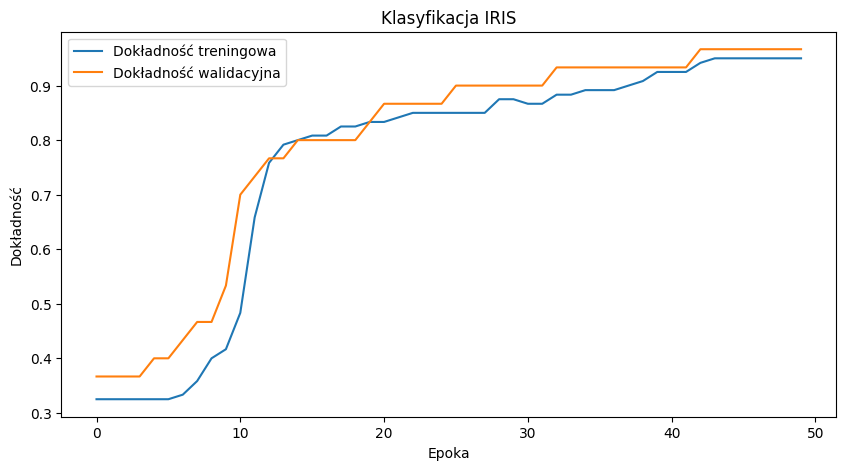

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_dense = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_dense.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_dense = model_dense.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)

print(f"Zadanie 1 (IRIS) - Wynik: {model_dense.evaluate(X_test, y_test, verbose=0)[1]:.2f}")
plot_history(history_dense, "Klasyfikacja IRIS")

C:\Users\Dawid\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9473 - loss: 0.1737 - val_accuracy: 0.9844 - val_loss: 0.0489
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9843 - loss: 0.0520 - val_accuracy: 0.9853 - val_loss: 0.0460
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9890 - loss: 0.0358 - val_accuracy: 0.9899 - val_loss: 0.0303
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9916 - loss: 0.0268 - val_accuracy: 0.9902 - val_loss: 0.0292
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9931 - loss: 0.0212 - val_accuracy: 0.9911 - val_loss: 0.0271


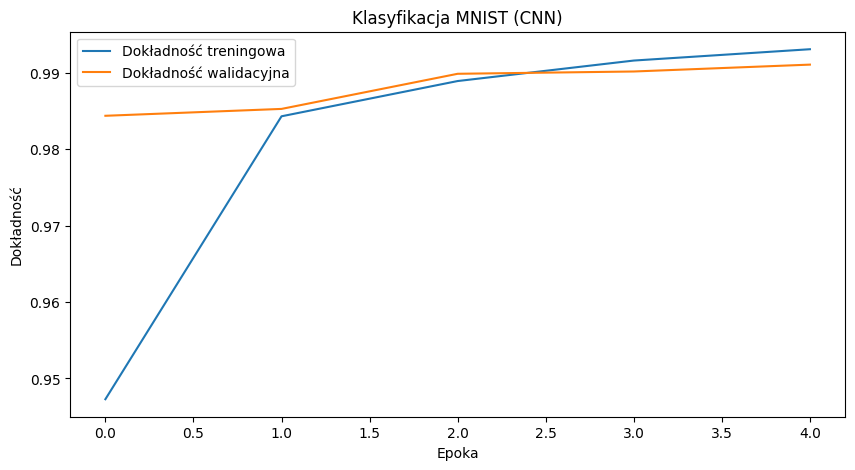

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., tf.newaxis] / 255.0
x_test = x_test[..., tf.newaxis] / 255.0

model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

plot_history(history_cnn, "Klasyfikacja MNIST (CNN)")

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 113ms/step - accuracy: 0.7881 - loss: 0.4417 - val_accuracy: 0.8574 - val_loss: 0.3327
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.8953 - loss: 0.2661 - val_accuracy: 0.8614 - val_loss: 0.3397
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.9234 - loss: 0.2040 - val_accuracy: 0.8607 - val_loss: 0.3348


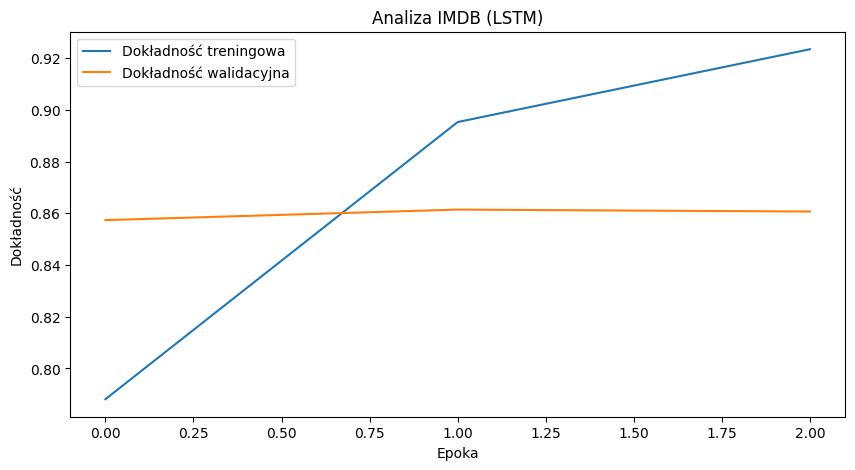

In [4]:
max_features = 10000
maxlen = 200 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=32),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(x_train, y_train, epochs=3, batch_size=64, validation_data=(x_test, y_test), verbose=1)

plot_history(history_lstm, "Analiza IMDB (LSTM)")

Zadanie 4 (Transformer) - Wynik: 0.50


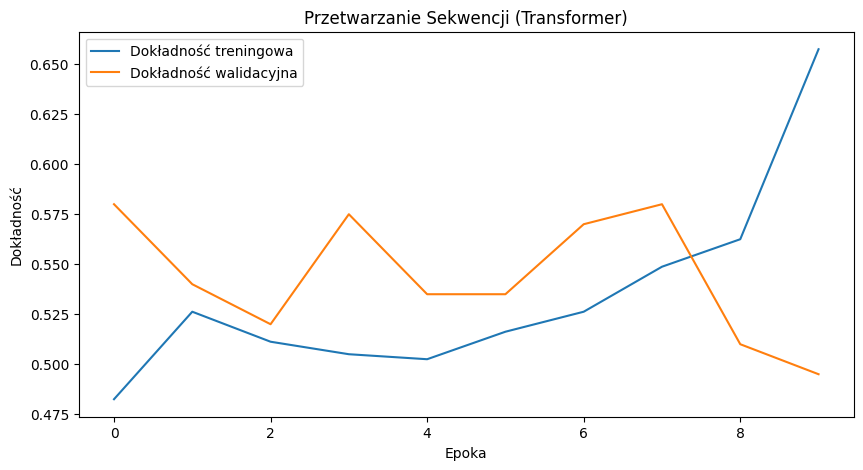

In [5]:
X_seq = np.random.rand(1000, 10, 64)
y_seq = (np.mean(X_seq, axis=(1, 2)) > 0.5).astype(int)

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_seq, y_seq, test_size=0.2)

input_layer = tf.keras.layers.Input(shape=(10, 64))
attention_output = tf.keras.layers.MultiHeadAttention(num_heads=4, key_dim=64)(input_layer, input_layer)
attention_output = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention_output + input_layer)
gap = tf.keras.layers.GlobalAveragePooling1D()(attention_output)
output = tf.keras.layers.Dense(1, activation='sigmoid')(gap)

model_transformer = tf.keras.Model(inputs=input_layer, outputs=output)

model_transformer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_transformer = model_transformer.fit(X_s_train, y_s_train, epochs=10, batch_size=32, 
                                            validation_data=(X_s_test, y_s_test), verbose=0)

print(f"Zadanie 4 (Transformer) - Wynik: {model_transformer.evaluate(X_s_test, y_s_test, verbose=0)[1]:.2f}")
plot_history(history_transformer, "Przetwarzanie Sekwencji (Transformer)")